In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CODE_Fault_Classification/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/CODE_Fault_Classification/Dataset/CWRU_48k_load_1_CNN_data.npz
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/feature_time_48k_2048_load_1.csv
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/B007_1_123.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/B014_1_190.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/IR014_1_175.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/B021_1_227.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/IR007_1_110.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/OR007_6_1_136.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/IR021_1_214.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/Time_Normal_1_098.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/OR014_6_1_202.mat
/content/drive/MyDrive/CODE_Fault_Classification/Dataset/raw/OR021_6_1_239.mat


In [5]:
data_time = pd.read_csv("/content/drive/MyDrive/CODE_Fault_Classification/Dataset/feature_time_48k_2048_load_1.csv")
data_time.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [6]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data_time["fault_code"] = ord_enc.fit_transform(data_time[["fault"]])
data_time[["fault", "fault_code"]]

,fault,fault_code
0,Ball_007_1,0.0
1,Ball_007_1,0.0
2,Ball_007_1,0.0
3,Ball_007_1,0.0
4,Ball_007_1,0.0
...,...,...
2295,Normal_1,6.0
2296,Normal_1,6.0
2297,Normal_1,6.0
2298,Normal_1,6.0


In [7]:
# List labels of bearing deffects
data_time.fault_code.unique() # Equivalent: data_time['fault_code'].unique()

array([0., 1., 2., 3., 4., 5., 7., 8., 9., 6.])

In [8]:
# How many data points are there for each defect type?
data_time[['fault_code', 'fault']].value_counts()

fault_code  fault     
0.0         Ball_007_1    230
1.0         Ball_014_1    230
2.0         Ball_021_1    230
3.0         IR_007_1      230
4.0         IR_014_1      230
5.0         IR_021_1      230
6.0         Normal_1      230
7.0         OR_007_6_1    230
8.0         OR_014_6_1    230
9.0         OR_021_6_1    230
Name: count, dtype: int64

In [9]:
# View some rows of the time serie for 'Ball_007_1' defect
data_time[data_time['fault'] == "Ball_007_1"]

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_code
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1,0.0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1,0.0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1,0.0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1,0.0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225,0.49692,-0.42787,0.018134,0.150290,0.151343,0.007713,-0.056754,3.283394,8.345722,Ball_007_1,0.0
226,0.63920,-0.52550,0.019247,0.161945,0.163045,0.005977,0.056390,3.920384,8.471037,Ball_007_1,0.0
227,0.43872,-0.38907,0.018747,0.131881,0.133175,-0.047987,-0.133409,3.294305,7.103795,Ball_007_1,0.0
228,0.49254,-0.54240,0.018965,0.152193,0.153333,-0.027618,0.290199,3.212226,8.084990,Ball_007_1,0.0


In [10]:
data_time_labeled = data_time.drop(columns=['fault'])


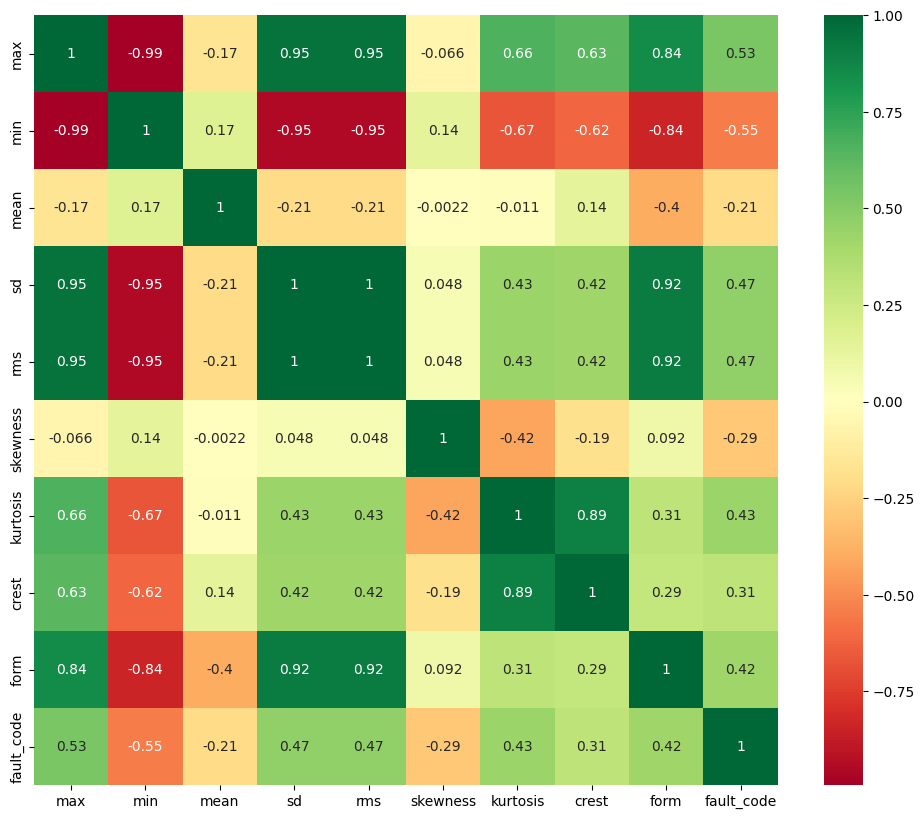

In [11]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(data_time_labeled.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

In [12]:
# Split bearing defects according to their location
ball_defects = ['Normal_1','Ball_007_1','Ball_014_1','Ball_021_1']
IR_defects =   ['Normal_1','IR_007_1','IR_014_1','IR_021_1']
OR_defects =  ['Normal_1','OR_007_6_1','OR_014_6_1','OR_021_6_1']

In [13]:
# Split features in two groups for better visualization
features_basic_subset =    data_time[['max','min','mean','sd','rms', 'fault']]
features_advanced_subset = data_time[['skewness','kurtosis','crest','form', 'fault']]

In [14]:
# Filter rows for the selected list of defects
defect_subset = features_basic_subset

ball_defects_data = defect_subset.loc[defect_subset['fault'].isin(ball_defects)]
IR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(IR_defects)]
OR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(OR_defects)]

ball_defects_data['fault'].value_counts()

fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
Normal_1      230
Name: count, dtype: int64

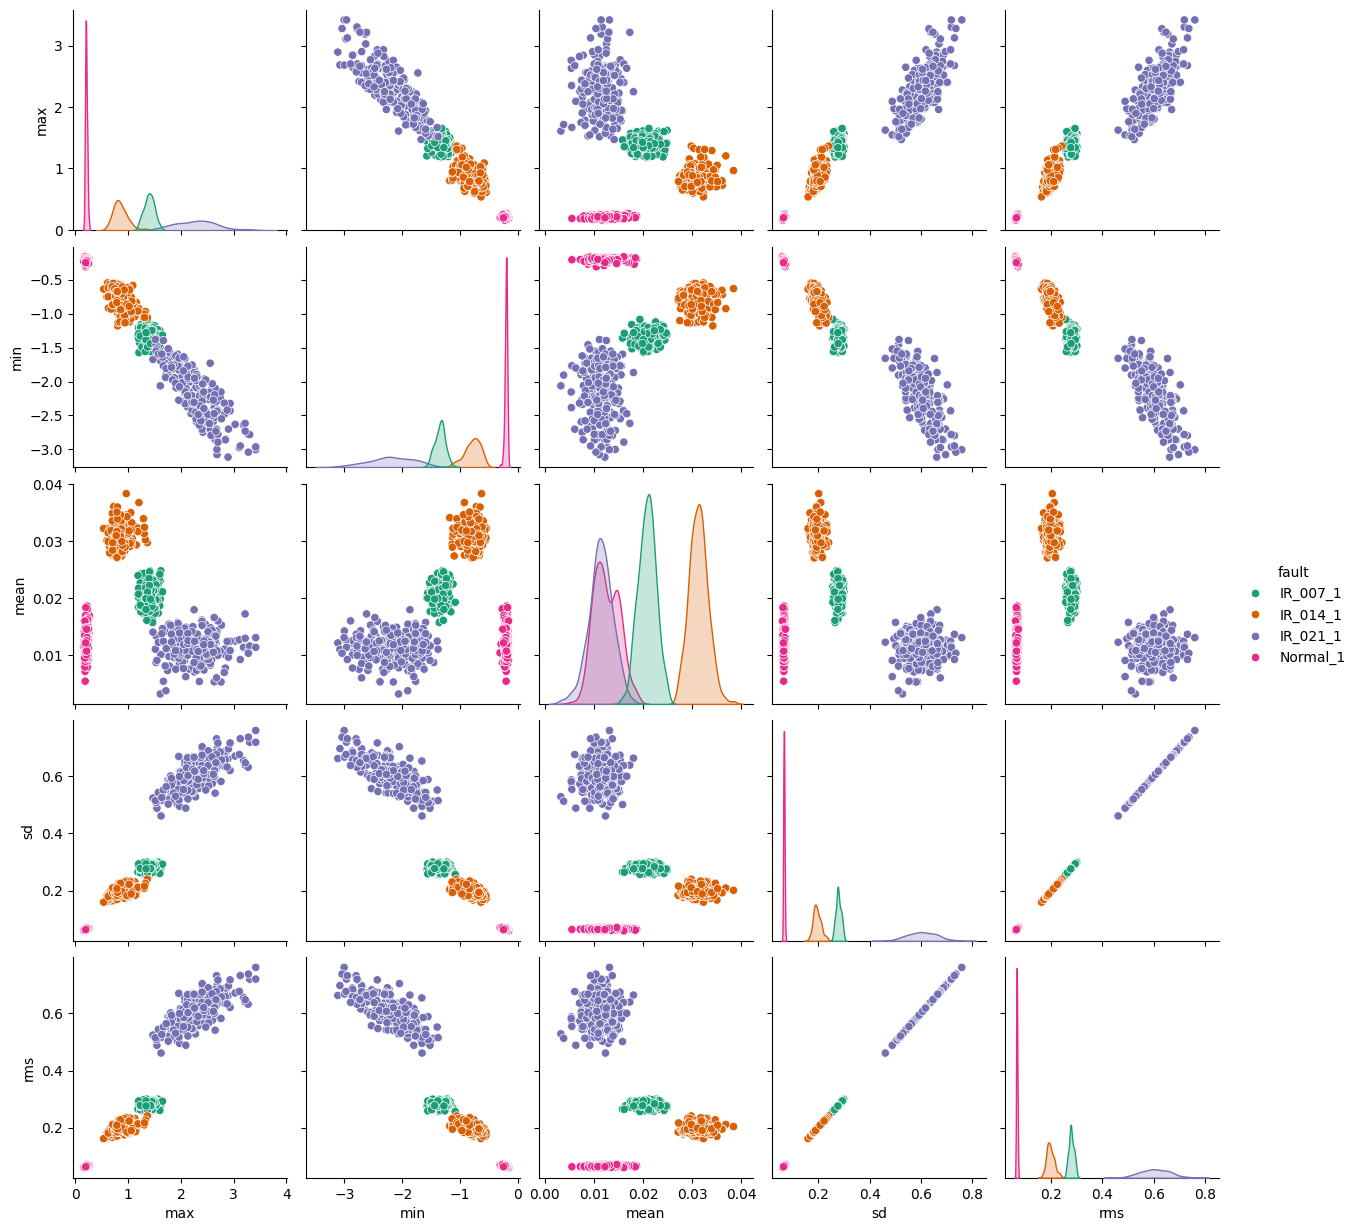

In [15]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(IR_defects_data,hue='fault',palette='Dark2')

In [16]:
# You can take any combination of features. Here it's selected the advanced list for demonstration purposes
#defect_subset = features_basic_subset OR features_advanced_subset
# And this would be the best set looking at the correlation matrix
features_custom_subset = data_time[['max','mean','kurtosis','crest', 'form','fault']]
defect_subset = features_custom_subset

In [17]:
# Filter rows for the selected list of defects
ball_defects_data = defect_subset.loc[defect_subset['fault'].isin(ball_defects)]
IR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(IR_defects)]
OR_defects_data =   defect_subset.loc[defect_subset['fault'].isin(OR_defects)]

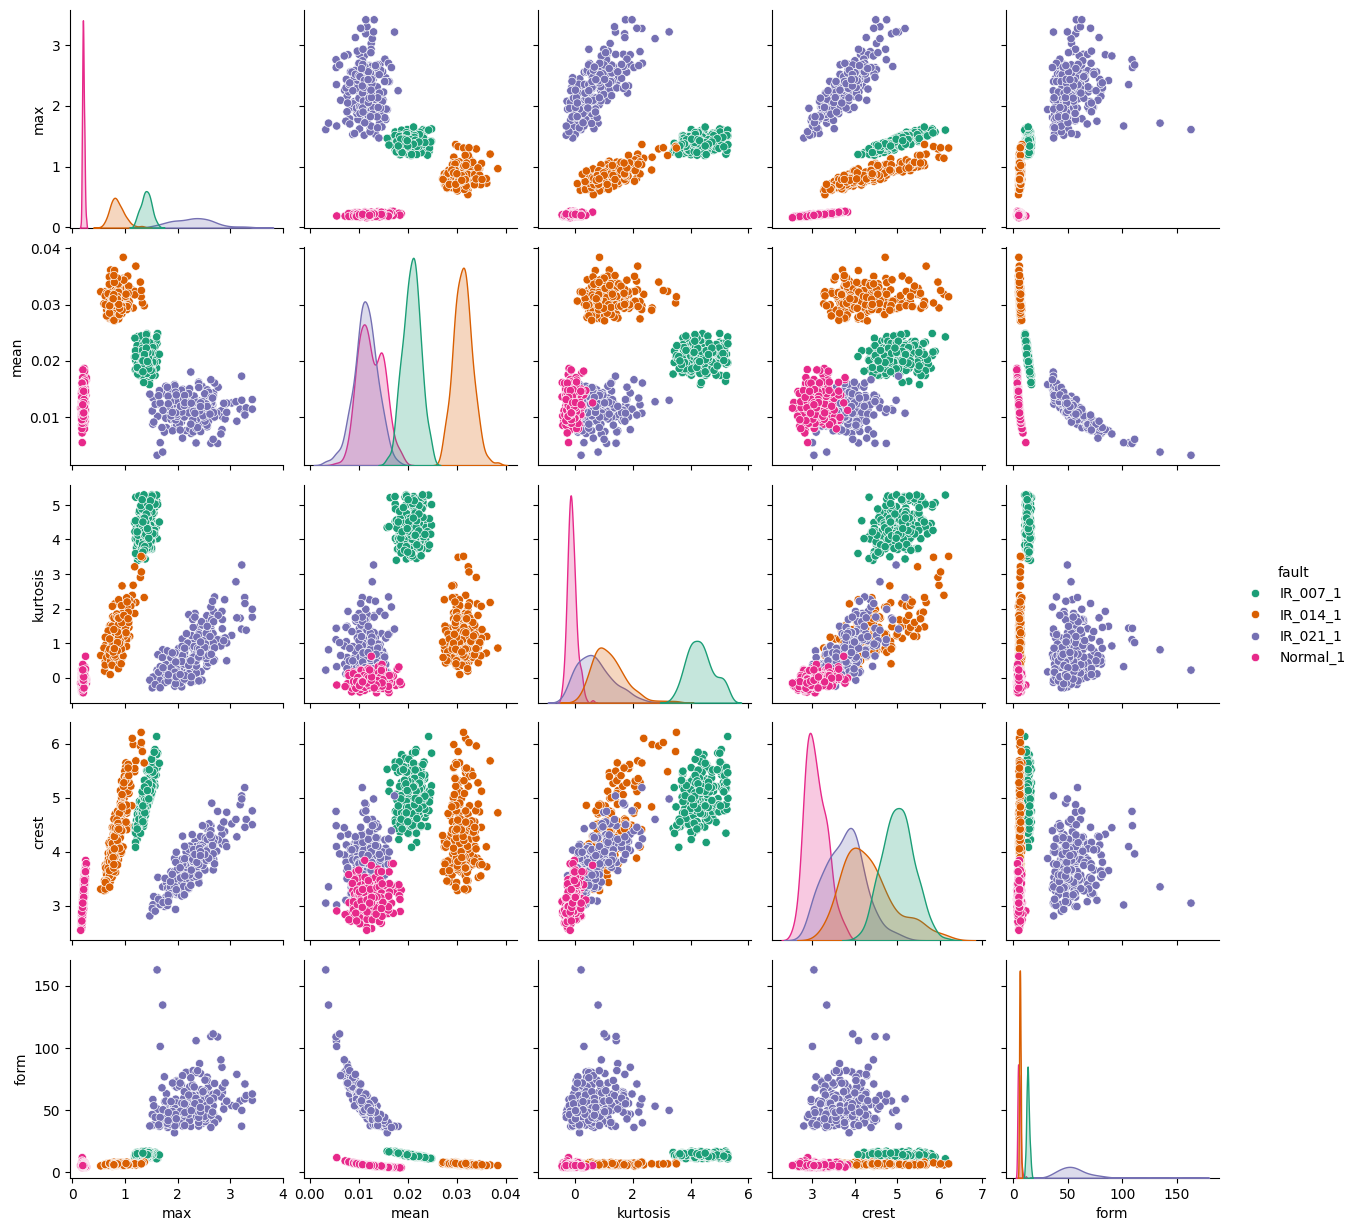

In [18]:
rcParams['figure.figsize'] = 8, 6
sns.pairplot(IR_defects_data,hue='fault',palette='Dark2')

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data_time = pd.read_csv("/content/drive/MyDrive/CODE_Fault_Classification/Dataset/feature_time_48k_2048_load_1.csv")
data_time

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'], random_state = 1234)
print( train_data['fault'].value_counts(), "\n\n", test_data['fault'].value_counts())

fault
IR_021_1      155
OR_014_6_1    155
Ball_021_1    155
Ball_007_1    155
IR_014_1      155
Ball_014_1    155
OR_007_6_1    155
OR_021_6_1    155
Normal_1      155
IR_007_1      155
Name: count, dtype: int64 

 fault
OR_007_6_1    75
IR_014_1      75
OR_014_6_1    75
OR_021_6_1    75
Normal_1      75
IR_021_1      75
Ball_014_1    75
Ball_007_1    75
Ball_021_1    75
IR_007_1      75
Name: count, dtype: int64


In [22]:
non_numeric_columns = train_data.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['fault'], dtype='object')


In [23]:
# Remove non-numeric columns
numeric_data = train_data.drop(columns=non_numeric_columns)


In [24]:
# Separate numeric and non-numeric data
numeric_data = train_data.select_dtypes(include=[np.number])
non_numeric_data = train_data.select_dtypes(exclude=[np.number])


In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(numeric_data)

# If you need to combine scaled numeric data back with non-numeric data:
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=numeric_data.columns)
final_train_data = pd.concat([train_data_scaled_df, non_numeric_data.reset_index(drop=True)], axis=1)

# Check the statistics of the scaled data
print(train_data_scaled_df.describe())


                max           min          mean            sd           rms  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.260640e-16  1.002782e-16 -2.888012e-16  6.016693e-17 -5.386372e-17   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -8.877055e-01 -2.951564e+00 -1.935376e+00 -9.258092e-01 -9.231913e-01   
25%   -7.088474e-01 -3.753614e-01 -6.908705e-01 -6.755048e-01 -6.760659e-01   
50%   -4.958143e-01  5.113022e-01 -3.141526e-01 -5.055027e-01 -5.038108e-01   
75%    4.477234e-01  7.003484e-01  4.560105e-01  7.015641e-01  7.003255e-01   
max    3.297226e+00  8.671141e-01  3.503861e+00  2.980548e+00  2.981995e+00   

           skewness      kurtosis         crest          form  
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  
mean   1.833659e-17 -5.500976e-17  4.950878e-16 -2.521281e-17  
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  
min   -5.951422e+00 -7.874742e-0

In [26]:
train_data_encoded = pd.get_dummies(train_data, drop_first=True)


In [27]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_encoded)

train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data_encoded.columns)
print(train_data_scaled_df.describe())


                max           min          mean            sd           rms  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.260640e-16  1.002782e-16 -2.888012e-16  6.016693e-17 -5.386372e-17   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -8.877055e-01 -2.951564e+00 -1.935376e+00 -9.258092e-01 -9.231913e-01   
25%   -7.088474e-01 -3.753614e-01 -6.908705e-01 -6.755048e-01 -6.760659e-01   
50%   -4.958143e-01  5.113022e-01 -3.141526e-01 -5.055027e-01 -5.038108e-01   
75%    4.477234e-01  7.003484e-01  4.560105e-01  7.015641e-01  7.003255e-01   
max    3.297226e+00  8.671141e-01  3.503861e+00  2.980548e+00  2.981995e+00   

           skewness      kurtosis         crest          form  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.833659e-17 -5.500976e-17  4.950878e-16 -2.521281e-17   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -5.951422e+00 -7.87474

In [28]:
# Drop the same non-numeric columns from both train and test data
non_numeric_columns = train_data.select_dtypes(include=['object']).columns

train_numeric_data = train_data.drop(columns=non_numeric_columns)
test_numeric_data = test_data.drop(columns=non_numeric_columns)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_numeric_data.iloc[:,:-1]) # Skip last column 'fault'


In [30]:
test_data_scaled = scaler.transform(test_numeric_data.iloc[:,:-1]) # Skip last column 'fault'


In [31]:
import pandas as pd

# Convert scaled data back to DataFrame
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_numeric_data.columns[:-1])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_numeric_data.columns[:-1])

# Describe scaled data
print(train_data_scaled_df.describe())
print(test_data_scaled_df.describe())


                max           min          mean            sd           rms  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.260640e-16  1.002782e-16 -2.888012e-16  6.016693e-17 -5.386372e-17   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -8.877055e-01 -2.951564e+00 -1.935376e+00 -9.258092e-01 -9.231913e-01   
25%   -7.088474e-01 -3.753614e-01 -6.908705e-01 -6.755048e-01 -6.760659e-01   
50%   -4.958143e-01  5.113022e-01 -3.141526e-01 -5.055027e-01 -5.038108e-01   
75%    4.477234e-01  7.003484e-01  4.560105e-01  7.015641e-01  7.003255e-01   
max    3.297226e+00  8.671141e-01  3.503861e+00  2.980548e+00  2.981995e+00   

           skewness      kurtosis         crest  
count  1.550000e+03  1.550000e+03  1.550000e+03  
mean   1.833659e-17 -5.500976e-17  4.950878e-16  
std    1.000323e+00  1.000323e+00  1.000323e+00  
min   -5.951422e+00 -7.874742e-01 -1.481163e+00  
25%   -3.678525e-01 -6.073122e-01 -8.0

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming train_data and test_data are your dataframes

# Step 1: Drop non-numeric columns
non_numeric_columns = train_data.select_dtypes(include=['object']).columns
train_numeric_data = train_data.drop(columns=non_numeric_columns)
test_numeric_data = test_data.drop(columns=non_numeric_columns)

# Step 2: Fit the scaler on training data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_numeric_data.iloc[:,:-1]) # Skip last column 'fault'

# Step 3: Transform the test data
test_data_scaled = scaler.transform(test_numeric_data.iloc[:,:-1]) # Skip last column 'fault'

# Step 4: Check the scaled data
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_numeric_data.columns[:-1])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_numeric_data.columns[:-1])

# Describe scaled data
print(train_data_scaled_df.describe())
print(test_data_scaled_df.describe())


                max           min          mean            sd           rms  \
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03   
mean   1.260640e-16  1.002782e-16 -2.888012e-16  6.016693e-17 -5.386372e-17   
std    1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00  1.000323e+00   
min   -8.877055e-01 -2.951564e+00 -1.935376e+00 -9.258092e-01 -9.231913e-01   
25%   -7.088474e-01 -3.753614e-01 -6.908705e-01 -6.755048e-01 -6.760659e-01   
50%   -4.958143e-01  5.113022e-01 -3.141526e-01 -5.055027e-01 -5.038108e-01   
75%    4.477234e-01  7.003484e-01  4.560105e-01  7.015641e-01  7.003255e-01   
max    3.297226e+00  8.671141e-01  3.503861e+00  2.980548e+00  2.981995e+00   

           skewness      kurtosis         crest  
count  1.550000e+03  1.550000e+03  1.550000e+03  
mean   1.833659e-17 -5.500976e-17  4.950878e-16  
std    1.000323e+00  1.000323e+00  1.000323e+00  
min   -5.951422e+00 -7.874742e-01 -1.481163e+00  
25%   -3.678525e-01 -6.073122e-01 -8.0

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [34]:
# Initualize the model
rf_model = RandomForestClassifier(n_estimators= 300, max_features = "sqrt", n_jobs = -1, random_state = 38)

# Train the model
rf_model.fit(train_data_scaled, train_data['fault'])

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=38)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
# Training data prediction
train_predictions = rf_model.predict(train_data_scaled)
# Testing data prediction
test_predictions = rf_model.predict(test_data_scaled)

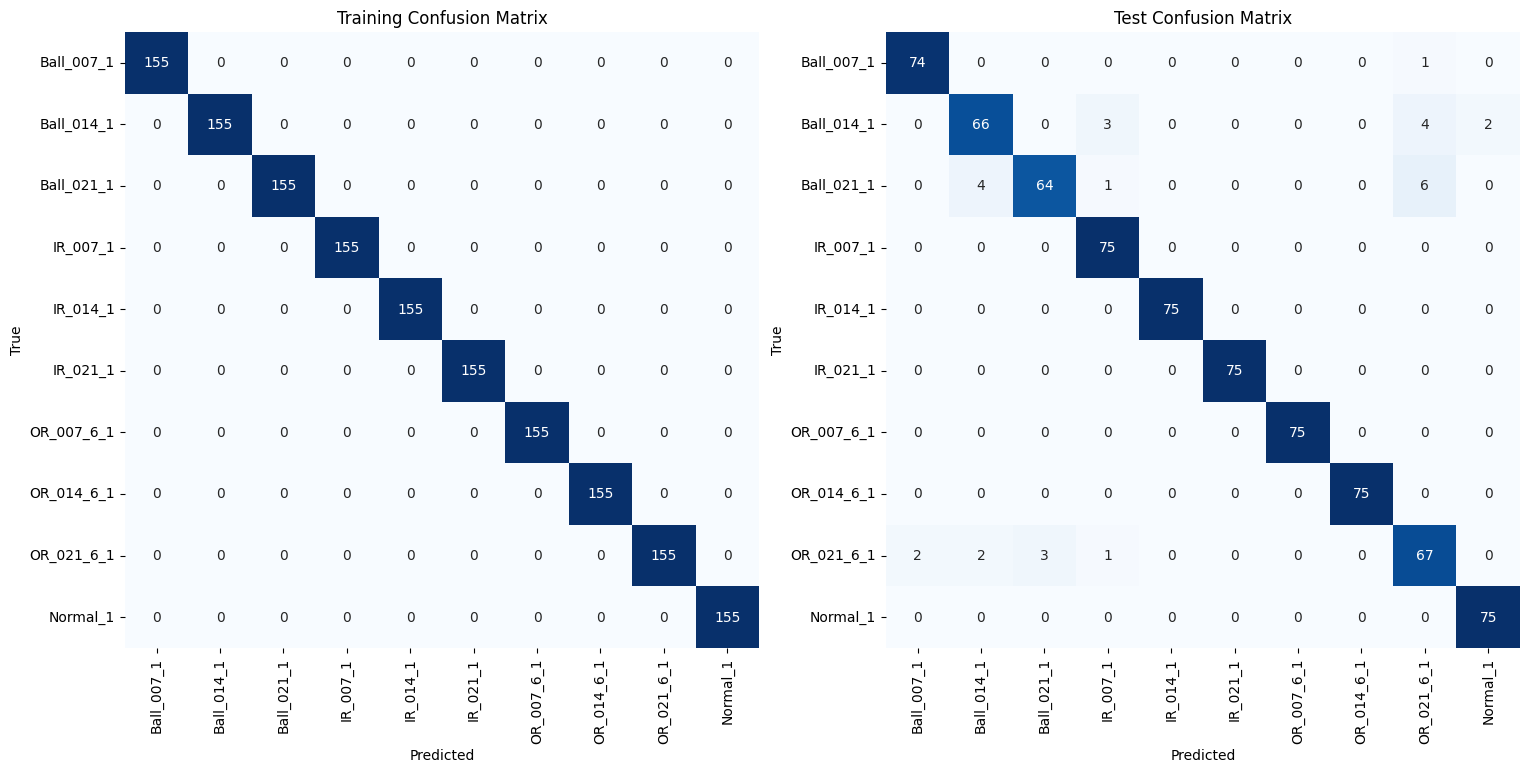

In [36]:
# Confusion matrix for training data
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)

# Confusion matrix for test data
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)
fault_type = data_time.fault.unique()

plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(test_data['fault'], test_predictions))

Accuracy: 0.9613333333333334


In [38]:
# Classification report (test set)
class_report = classification_report(y_pred = test_predictions, y_true = test_data['fault'])
print(class_report)

              precision    recall  f1-score   support

  Ball_007_1       0.97      0.99      0.98        75
  Ball_014_1       0.92      0.88      0.90        75
  Ball_021_1       0.96      0.85      0.90        75
    IR_007_1       0.94      1.00      0.97        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       1.00      1.00      1.00        75
    Normal_1       1.00      1.00      1.00        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.86      0.89      0.88        75
  OR_021_6_1       0.97      1.00      0.99        75

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [39]:
# Obtain feature importance
feature_importance = rf_model.feature_importances_
# Check that importances sum is 1
feature_importance.sum()

1.0

In [40]:
# Retrieve features' names
features = train_data.columns[:-1]
# And count them
num_features = len(features)

# Sort features by descending importance
indices = np.argsort(feature_importance)[::-1]

# Reorder dict by descending feature importance
features_sorted = []
for key in indices:
    features_sorted = np.append(features_sorted, features[key])

In [41]:
print("Number of features:", num_features)
print("Shape of feature_importance:", feature_importance.shape)


Number of features: 9
Shape of feature_importance: (8,)


Number of features: 9
Shape of feature_importance: (8,)


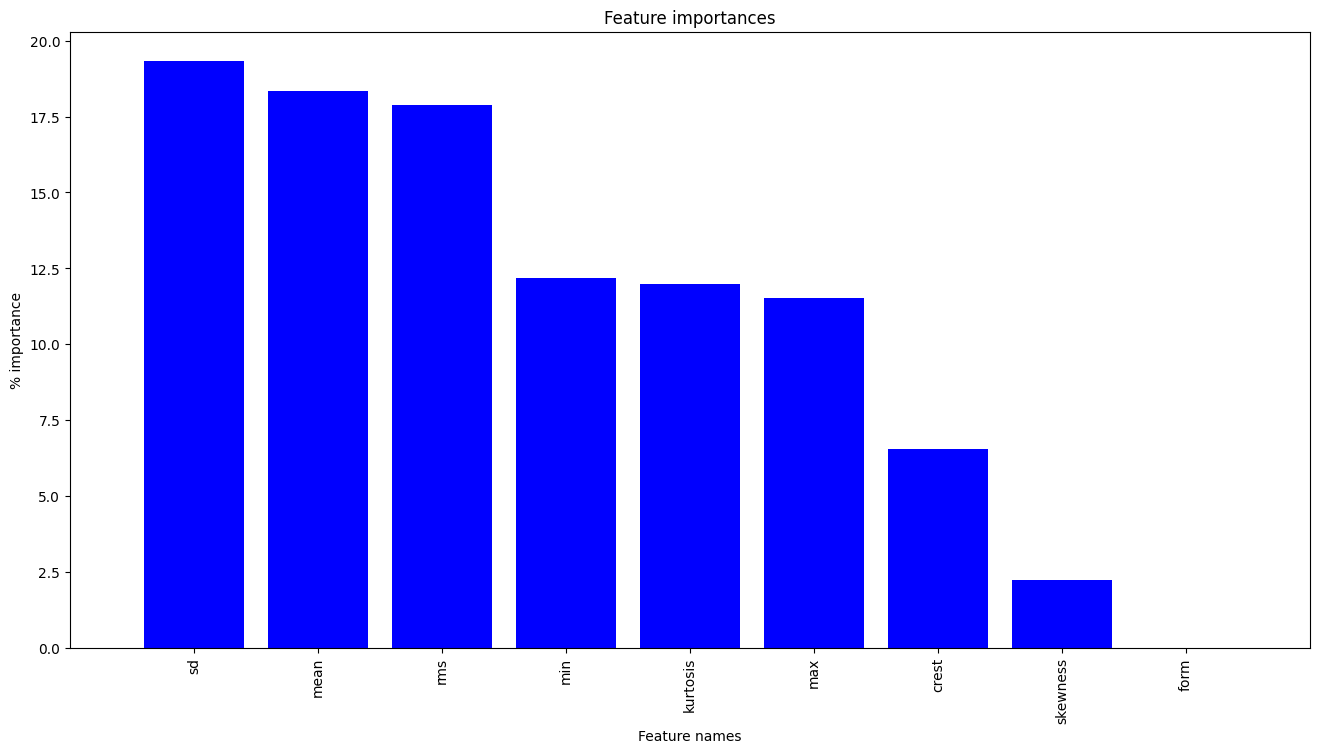

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_data is your dataframe and feature_importance is your feature importance array

# Retrieve feature names
features = train_data.columns[:-1]
num_features = len(features)

# Check the shapes
print("Number of features:", num_features)
print("Shape of feature_importance:", feature_importance.shape)

# Handle the mismatch (for demonstration purposes, here we pad the array)
if len(feature_importance) < num_features:
    # Pad with zeros (or any other method you prefer)
    feature_importance = np.pad(feature_importance, (0, num_features - len(feature_importance)), 'constant')
elif len(feature_importance) > num_features:
    # Trim the array
    feature_importance = feature_importance[:num_features]

# Ensure the lengths now match
assert len(feature_importance) == num_features, "Mismatch between number of features and feature importances"

# Sort features by descending importance
indices = np.argsort(feature_importance)[::-1]

# Reorder features by descending feature importance
features_sorted = [features[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(16, 8))
plt.title("Feature importances")
plt.bar(range(num_features), feature_importance[indices] * 100, color="blue", align="center")
plt.xticks(range(num_features), features_sorted, rotation=90)
plt.xlim([-1, num_features])
plt.ylabel('% importance')
plt.xlabel("Feature names")
plt.show()
